# WhatsApp Chat  Analysis

ASRIL MURDIAN TAHIR (2001010110) 

In [1]:
import regex 
import re
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)?(AM|PM|am|pm)?' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [3]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [4]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [5]:
parsedData=[]
conversation = 'WhatsApp Chat with Eka putri.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skip BARIS pertama
    
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        
        if startsWithDateAndTime(line):
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [6]:
print(fp)

<_io.TextIOWrapper name='WhatsApp Chat with Eka putri.txt' mode='r' encoding='utf-8'>


In [7]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.head(10)

C:\Users\MSI\AppData\Local\Temp\ipykernel_12480\2907646051.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Date     Time         Author                   Message
0 2022-06-30  7:07 PM  Asril Murdian                        Ko
1 2022-06-30  8:28 PM      Eka putri                      Iyaa
2 2022-06-30  8:28 PM      Eka putri         Kabar baik, kamu?
3 2022-06-30  8:29 PM  Asril Murdian                    Kenapa
4 2022-06-30  8:45 PM      Eka putri                  Kok beda
5 2022-06-30  8:47 PM  Asril Murdian                    Apanya
6 2022-06-30  8:51 PM      Eka putri        Beda kenapa wa nya
7 2022-06-30  8:53 PM  Asril Murdian  Iya, kan hp ilanv kmaren
8 2022-06-30  8:54 PM      Eka putri            Iii kapannn???
9 2022-06-30  8:54 PM  Asril Murdian          Udh mau 2 minggu

membuat file csv untuk data chat


In [8]:
df.shape

(4039, 4)

In [9]:
output_file = 'output.csv'
df.to_csv(output_file, index=False)
print(f"DataFrame has been saved to '{output_file}' as a CSV file.")

DataFrame has been saved to 'output.csv' as a CSV file.


In [10]:
print(messageBuffer)

['<Media omitted>']


 menampilkan data 10 waktu tersering saat chating

Text(0, 0.5, 'Time')

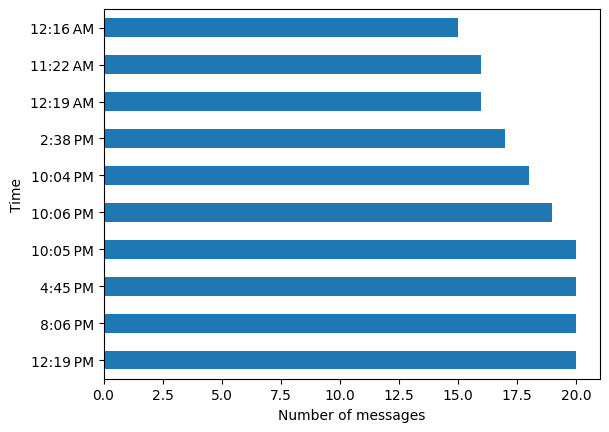

In [11]:
df['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Time')

menampilkan 10 hari dengan intensitas chating terbanyak

Date
2023-03-06    240
2023-03-14    146
2022-06-30    139
2023-05-09    135
2022-12-31    132
             ... 
2022-12-07      2
2022-09-08      2
2023-03-28      1
2022-07-09      1
2023-06-10      1
Name: count, Length: 106, dtype: int64


Text(0, 0.5, 'Date')

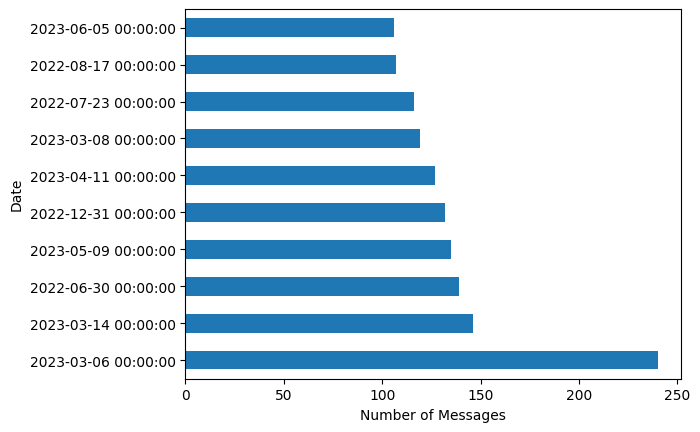

In [12]:
df['Date'].value_counts().head(10).plot.barh()
print(df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [13]:
df['MessageCount'] = 1
date_df = df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

In [14]:
df['Message']

0                                                 Ko
1                                               Iyaa
2                                  Kabar baik, kamu?
3                                             Kenapa
4                                           Kok beda
                            ...                     
4034                                      owh iyadah
4035                               skrg sy coba coba
4036    Saya mau buat laporan akhir saya dulu bentar
4037                                     iya mangats
4038                                          Bakpao
Name: Message, Length: 4039, dtype: object

menampilkan siapa saja pengirim pesan

In [15]:
df.Author.unique()

array(['Asril Murdian', 'Eka putri', None], dtype=object)

menampilkan 

In [16]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

links = np.sum(df.urlcount)
print("data pesan")
print("Messages:",len(df))
print("Media:",media_messages)
print("Links:",links)

data pesan
Messages: 4039
Media: 119
Links: 7


In [17]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Asril Murdian", "Eka putri"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media) 
  print()

<class 'pandas.core.frame.DataFrame'>
Index: 3920 entries, 0 to 4038
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3920 non-null   datetime64[ns]
 1   Time          3920 non-null   object        
 2   Author        3908 non-null   object        
 3   Message       3920 non-null   object        
 4   MessageCount  3920 non-null   int64         
 5   urlcount      3920 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 214.4+ KB
Stats of Asril Murdian -
Messages Sent 1963
Words per message 3.1711665817626082
Media Messages Sent 58

Stats of Eka putri -
Messages Sent 1945
Words per message 3.7753213367609253
Media Messages Sent 61



In [18]:
df.iloc[messages_df['Word_Count'].argmax()]

Date                    2022-07-08 00:00:00
Time                               10:51 PM
Author                            Eka putri
Message         Kalau bisa dh gas daftar ni
MessageCount                              1
urlcount                                  0
Name: 350, dtype: object

ada 75995 kata pada pesan ini.


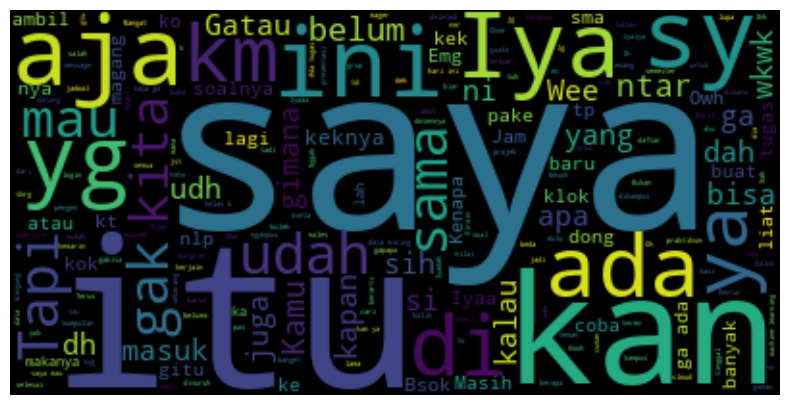

In [19]:
text = " ".join(review for review in messages_df.Message)
print ("ada {} kata pada pesan ini.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Nama Pengirim : Asril Murdian


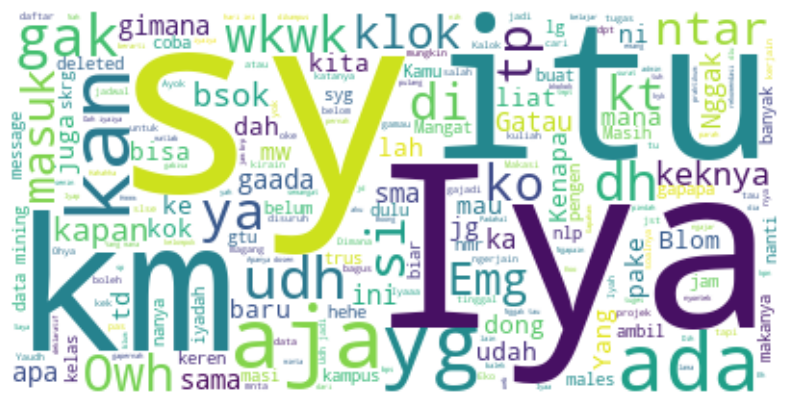

Nama Pengirim : Eka putri


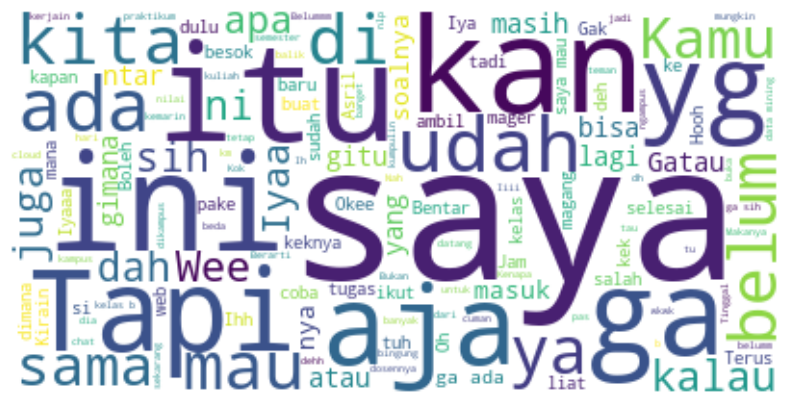

In [20]:
l = ["Asril Murdian", "Eka putri"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
  #Generate a word cloud image
    print('Nama Pengirim :',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Persiapkan dataset kata-kata kotor (contoh sederhana)
hated_words = ["buta", "anjing", "babi", "setan", "alay","botak"]

# Fungsi untuk mendeteksi kata-kata kotor dalam teks
def detect_hated_words(text):
    # Tokenisasi kata-kata dalam teks
    tokens = word_tokenize(text.lower())
    # Hapus stop words
    stop_words = set(stopwords.words("indonesian"))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Deteksi kata-kata romantis
    detected_hated_words = [word for word in filtered_tokens if word in hated_words]
    
    return detected_hated_words

# Memproses chat satu per satu
detected_words_count = 0
detected_words_list = []  # Daftar kata-kata kotor yang dideteksi

# Memisahkan chat menjadi baris-baris
chat_lines = df['Message']
for line in chat_lines:
    detected_words = detect_hated_words(line)
    detected_words_count += len(detected_words)
    detected_words_list.extend(detected_words)  # Menambahkan kata-kata romantis yang dideteksi ke dalam daftar

# Menampilkan hasil
if detected_words_count > 0:
    print("Terdapat", detected_words_count, "kata-kata kotor dalam chat.")
    
else:
    print("Tidak ada kata-kata kotor dalam chat.")

Terdapat 5 kata-kata kotor dalam chat.


In [22]:
print("Kata-kata kotor yang dideteksi:")
for i, word in enumerate(detected_words_list, start=1):
    print(f"{i}. {word}")

Kata-kata kotor yang dideteksi:
1. alay
2. setan
3. buta
4. alay
5. alay


# Sentiment analysis

In [23]:
import pandas as pd
from textblob import TextBlob
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string


stopword_factory = StopWordRemoverFactory()
stemmer_factory = StemmerFactory()
stopword_remover = stopword_factory.create_stop_word_remover()
stemmer = stemmer_factory.create_stemmer()

# Fungsi preprocessing teks
def preprocess_text(text):
    # Menghapus tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenisasi
    tokens = text.split()
    # Menghapus stopwords
    tokens = [token for token in tokens if not stopword_remover.remove(token)]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Menggabungkan kembali token-token yang telah dipreprocessing menjadi teks baru
    preprocessed_text = ' '.join(stemmed_tokens)
    return text

# Analisis sentimen menggunakan pustaka TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Menambahkan kolom 'Sentiment' ke dataframe
df['Sentiment'] = df['Message'].apply(lambda x: analyze_sentiment(preprocess_text(x)))

# Menampilkan dataframe dengan kolom Sentiment
data=pd.DataFrame(df)
data

Date      Time         Author  \
0    2022-06-30   7:07 PM  Asril Murdian   
1    2022-06-30   8:28 PM      Eka putri   
2    2022-06-30   8:28 PM      Eka putri   
3    2022-06-30   8:29 PM  Asril Murdian   
4    2022-06-30   8:45 PM      Eka putri   
...         ...       ...            ...   
4034 2023-06-08  11:22 PM  Asril Murdian   
4035 2023-06-08  11:23 PM  Asril Murdian   
4036 2023-06-08  11:25 PM      Eka putri   
4037 2023-06-08  11:25 PM  Asril Murdian   
4038 2023-06-10   6:49 PM  Asril Murdian   

                                           Message  MessageCount  urlcount  \
0                                               Ko             1         0   
1                                             Iyaa             1         0   
2                                Kabar baik, kamu?             1         0   
3                                           Kenapa             1         0   
4                                         Kok beda             1         0   
...                                            ...           ...       ...   
4034                                    owh iyadah             1         0   
4035                             skrg sy coba coba             1         0   
4036  Saya mau buat laporan akhir saya dulu bentar             1         0   
4037                                   iya mangats             1         0   
4038                                        Bakpao             1         0   

      Sentiment  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
4034        0.0  
4035        0.0  
4036        0.0  
4037        0.0  
4038        0.0  

[4039 rows x 7 columns]

In [24]:
df['positive_sentiments'] = df['Sentiment'] > 0.0
df['negative_sentiments'] = df['Sentiment'] < 0.0
df['netral_sentiments'] = df['Sentiment'] == 0.0

In [25]:
# Filter sentimen 
sentiments = df[df['Sentiment'] > 0.0]
# Menampilkan DataFrame hasil analisis sentiment 
sent=pd.DataFrame(sentiments)
sent.head(5)

Date      Time         Author  \
484  2022-07-13   5:48 PM  Asril Murdian   
910  2022-07-25  11:58 AM  Asril Murdian   
1275 2022-08-17  11:22 PM      Eka putri   
1439 2022-12-14   6:44 PM  Asril Murdian   
1567 2022-12-31   4:18 PM  Asril Murdian   

                                                Message  MessageCount  \
484                                                Okay             1   
910                                                Okay             1   
1275  Lupa saya udah verif ktp atau belum, soalnya j...             1   
1439                                            Welcome             1   
1567                  Td bahasa acehnya i love you apa?             1   

      urlcount  Sentiment  positive_sentiments  negative_sentiments  \
484          0        0.5                 True                False   
910          0        0.5                 True                False   
1275         0        0.5                 True                False   
1439         0        0.8                 True                False   
1567         0        0.5                 True                False   

      netral_sentiments  
484               False  
910               False  
1275              False  
1439              False  
1567              False

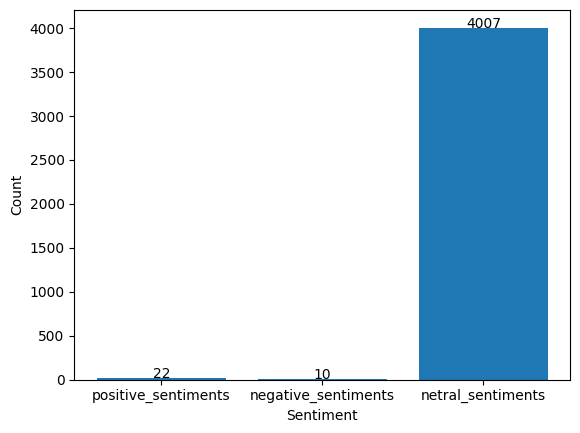

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah sentimen positif, negatif, dan netral
sentiment_counts = df[['positive_sentiments', 'negative_sentiments', 'netral_sentiments']].sum()

# Buat bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)

for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value, str(value), ha='center')

# Atur label sumbu x dan y
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Tampilkan bar plot
plt.show()


# Autocomplete

In [27]:
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import defaultdict

class WhatsAppAutocomplete:
    def __init__(self):
        self.ngram_model = defaultdict(lambda: defaultdict(int))
    
    def train(self, data):
        # Tokenisasi data menjadi kata-kata
        tokens = nltk.word_tokenize(data)
        
        # Membangun model n-gram
        for n in range(1, 6):  # Membangun model unigram, bigram, dan trigram
            ngrams_data = ngrams(tokens, n, pad_left=True, pad_right=True)
            for ngram in ngrams_data:
                prefix = tuple(ngram[:-1])
                suffix = ngram[-1]
                self.ngram_model[prefix][suffix] += 1
    
    def get_suggestions(self, text):
        # Membagi teks menjadi kata-kata
        tokens = nltk.word_tokenize(text)
        # Mengambil prefix terakhir untuk memprediksi kata berikutnya
        prefix = tuple(tokens[-2:])
        # Memilih kata berikutnya berdasarkan probabilitas
        suggestions = sorted(self.ngram_model[prefix], key=self.ngram_model[prefix].get, reverse=True)[:5]
        return suggestions
    


# Membaca data dari file CSV
data = pd.read_csv('output.csv')
data['Message'] = data['Message'].astype(str)
data['Message'] = data['Message'].str.lower()
texts = data['Message'].tolist()
combined_text = ' '.join(texts)

# Melatih model autocomplete
model = WhatsAppAutocomplete()
model.train(combined_text)

In [28]:
#menghitung persentase setiap sugesstion
def calculate_percentages(suggestions):
    total_count = sum(suggestions.values())
    percentages = {k: v / total_count * 100 for k, v in suggestions.items()}
    return percentages

# Contoh penggunaan
input_text = "machine learning"
suggestions = model.get_suggestions(input_text)
percentage = calculate_percentages(model.ngram_model[tuple(input_text.split()[-2:])])
print("Persentase kata yang paling direkomendasikan:")
print("Rekomendasi autocomplete:", suggestions)
for word, percent in percentage.items():
    print(f"{word}: {percent:.2f}%")

Persentase kata yang paling direkomendasikan:
Rekomendasi autocomplete: ['?', 'saya', 'juga', 'iya', 'tu']
?: 40.00%
saya: 13.33%
iya: 6.67%
tu: 6.67%
sama: 6.67%
dong: 6.67%
juga: 13.33%
atau: 6.67%
